<a href="https://colab.research.google.com/github/KptnHaddock/nibe/blob/master/applecottage_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applecottage heatpump data model April 2025

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "applecottage"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Load the .csv file and replace empty cells with "0"

In [ ]:
import pandas as pd

df = pd.read_csv('applecottage 240616-250419.csv', delimiter=';')

# Fill empty (NaN) cells with 0
df.fillna(0, inplace=True)

# Display the first few rews to confirm
df.head()

,time,temp,wind,solar_cells,heatpump,Unnamed: 5
0,2024-06-15 00:00,11.0,5.6,0.0,0.0,0.0
1,2024-06-15 01:00,11.0,6.5,0.0,0.4,0.0
2,2024-06-15 02:00,10.4,7.2,0.0,0.7,0.0
3,2024-06-15 03:00,10.2,6.5,0.0,0.2,0.0
4,2024-06-15 04:00,9.1,6.1,28.0,0.3,0.0


In [ ]:
df.dtypes

time            object
temp           float64
wind           float64
solar_cells    float64
heatpump       float64
Unnamed: 5     float64
dtype: object

In [ ]:
# Change value type in column time from type object to type time
df["time"] = pd.to_datetime(df["time"])

# Check data fram dtypes
df.dtypes

time           datetime64[ns]
temp                  float64
wind                  float64
solar_cells           float64
heatpump              float64
Unnamed: 5            float64
dtype: object

In [ ]:
# Remove last column named "Unnamed: 5"
df = df.drop(columns=["Unnamed: 5"])

In [ ]:
df.head()

,time,temp,wind,solar_cells,heatpump
0,2024-06-15 00:00,11.0,5.6,0.0,0.0
1,2024-06-15 01:00,11.0,6.5,0.0,0.4
2,2024-06-15 02:00,10.4,7.2,0.0,0.7
3,2024-06-15 03:00,10.2,6.5,0.0,0.2
4,2024-06-15 04:00,9.1,6.1,28.0,0.3


In [ ]:
# Get a concise summary of the DataFrame, including the data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7416 entries, 0 to 7415
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         7416 non-null   datetime64[ns]
 1   temp         7416 non-null   float64       
 2   wind         7416 non-null   float64       
 3   solar_cells  7416 non-null   float64       
 4   heatpump     7416 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 289.8 KB


In [ ]:
# Display the count of unique values in the "heapump" column to understand the distribution of this categorical feature
df["heatpump"].value_counts()

heatpump
0.00    1488
0.60     516
0.50     502
0.40     493
0.10     426
0.80     397
0.30     360
0.70     358
0.90     349
1.00     311
0.20     283
1.10     245
1.30     226
1.20     224
1.40     198
1.50     167
1.60     135
1.70     119
1.80      96
1.90      81
2.00      69
2.10      62
2.30      45
2.20      38
2.50      36
2.40      30
0.66      24
0.88      18
2.60      17
0.77      15
0.55      13
3.10       8
3.00       7
2.90       7
2.80       6
2.70       6
3.50       5
0.44       5
0.99       5
3.80       4
3.20       4
3.30       4
3.60       3
3.40       3
1.54       2
1.65       2
1.43       1
1.21       1
4.40       1
5.20       1
Name: count, dtype: int64

In [ ]:
# Generate descriptive statistics for the numerical columns in the DataFrame to summarize the central tendency, dispersion, and shape of the dataset's distribution
df.describe()

,time,temp,wind,solar_cells,heatpump
count,7416,7416.000000,7416.000000,7416.000000,7416.000000
mean,2024-11-16 11:30:00.000000256,8.056088,12.174939,557.779935,0.698429
min,2024-06-15 00:00:00,-10.650000,1.100000,0.000000,0.000000
25%,2024-08-31 05:45:00,2.300000,8.150000,0.000000,0.100000
50%,2024-11-16 11:30:00,7.550000,11.300000,0.000000,0.600000
75%,2025-02-01 17:15:00,14.350000,15.200000,476.500000,1.000000
max,2025-04-19 23:00:00,24.900000,39.900000,5154.000000,5.200000
std,NaN,7.299909,5.749457,1097.277775,0.641918


By generating histograms, you can visually inspect the distribution of numerical features in the dataset.

* Identify Outliers: Histograms help in spotting outliers and unusual data points in the features.
* Understand Data Spread: They provide insights into the spread and central tendency of the data.
* Feature Engineering: The visual information can be useful for feature engineering, such as deciding on transformations or handling skewed data.


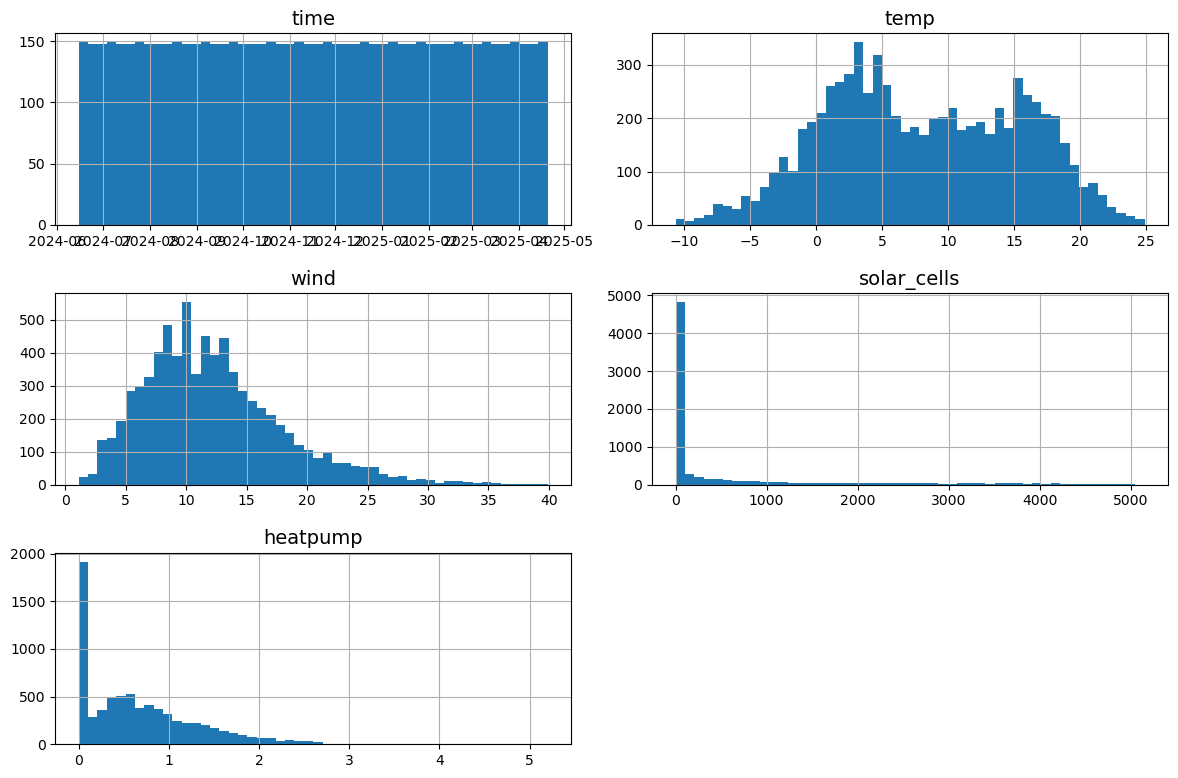

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Generate histograms for each numerical column in the DataFrame
df.hist(bins=50, figsize=(12, 8)) # Plot histograms with 50 bins and a figure size of 12x8 inches
#save_fig("attribute_histogram_plots")  # extra code
save_fig("numerical_colums_in_applecottage_df")
plt.show()

## Create training and test set
- start by adding columns for hours, week-day, week-number and month

In [ ]:
# Hour of the day (0 to 23)
df["hour"] = df["time"].dt.hour

# Day of the week (0 = Monday, 6 = Sunday)
df["day_of_week"] = df["time"].dt.weekday

# ISO week number (1 to 53)
df["week"] = df["time"].dt.isocalendar().week

# Month number (1 = January, 12 = December)
df["month"] = df["time"].dt.month


Add one more column with roling average temperature from past four hours
Adjust the first four rows to avoid NaN cells

In [ ]:
# Add one more column with roling average temperature from past four hours
df["past 4h avg temp"] = df["temp"].rolling(window=4).mean()
# Back fill the first four rows to avoid NaN cells
df["past 4h avg temp"] = df["past 4h avg temp"].fillna(method="bfill")  # or ffill, or a value

C:\Users\Viktor\AppData\Local\Temp\ipykernel_3016\3140886435.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["past 4h avg temp"] = df["past 4h avg temp"].fillna(method="bfill")  # or ffill, or a value


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Step 1: Set up StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Step 2: Apply the split using the month column as the stratification label
for train_index, test_index in splitter.split(df, df["month"]):
    strat_train_set = df.loc[train_index].copy()
    strat_test_set = df.loc[test_index].copy()


In [ ]:
# Check month disribution to ensure data is balanced
print(strat_train_set["month"].value_counts(normalize=True))
print(strat_test_set["month"].value_counts(normalize=True))


month
1     0.100303
10    0.100303
8     0.100303
12    0.100303
3     0.100303
7     0.100303
9     0.097100
11    0.097100
2     0.090695
4     0.061531
6     0.051753
Name: proportion, dtype: float64
month
7     0.100404
3     0.100404
10    0.100404
8     0.100404
12    0.100404
1     0.100404
9     0.097035
11    0.097035
2     0.090296
4     0.061321
6     0.051887
Name: proportion, dtype: float64


In [ ]:
df.head(10)

,time,temp,wind,solar_cells,heatpump,hour,day_of_week,week,month,past 4h avg temp
0,2024-06-15 00:00:00,11.0,5.6,0.0,0.0,0,5,24,6,10.650
1,2024-06-15 01:00:00,11.0,6.5,0.0,0.4,1,5,24,6,10.650
2,2024-06-15 02:00:00,10.4,7.2,0.0,0.7,2,5,24,6,10.650
3,2024-06-15 03:00:00,10.2,6.5,0.0,0.2,3,5,24,6,10.650
4,2024-06-15 04:00:00,9.1,6.1,28.0,0.3,4,5,24,6,10.175
5,2024-06-15 05:00:00,9.7,6.1,105.0,0.4,5,5,24,6,9.850
6,2024-06-15 06:00:00,10.7,6.5,195.0,0.2,6,5,24,6,9.925
7,2024-06-15 07:00:00,13.2,6.5,440.0,0.3,7,5,24,6,10.675
8,2024-06-15 08:00:00,14.6,7.9,592.0,0.0,8,5,24,6,12.050
9,2024-06-15 09:00:00,14.6,7.9,1415.0,0.0,9,5,24,6,13.275


Create a scatter matrix plot for the attributes in the data frame df in order to visualize the relationships between pairs of variables.

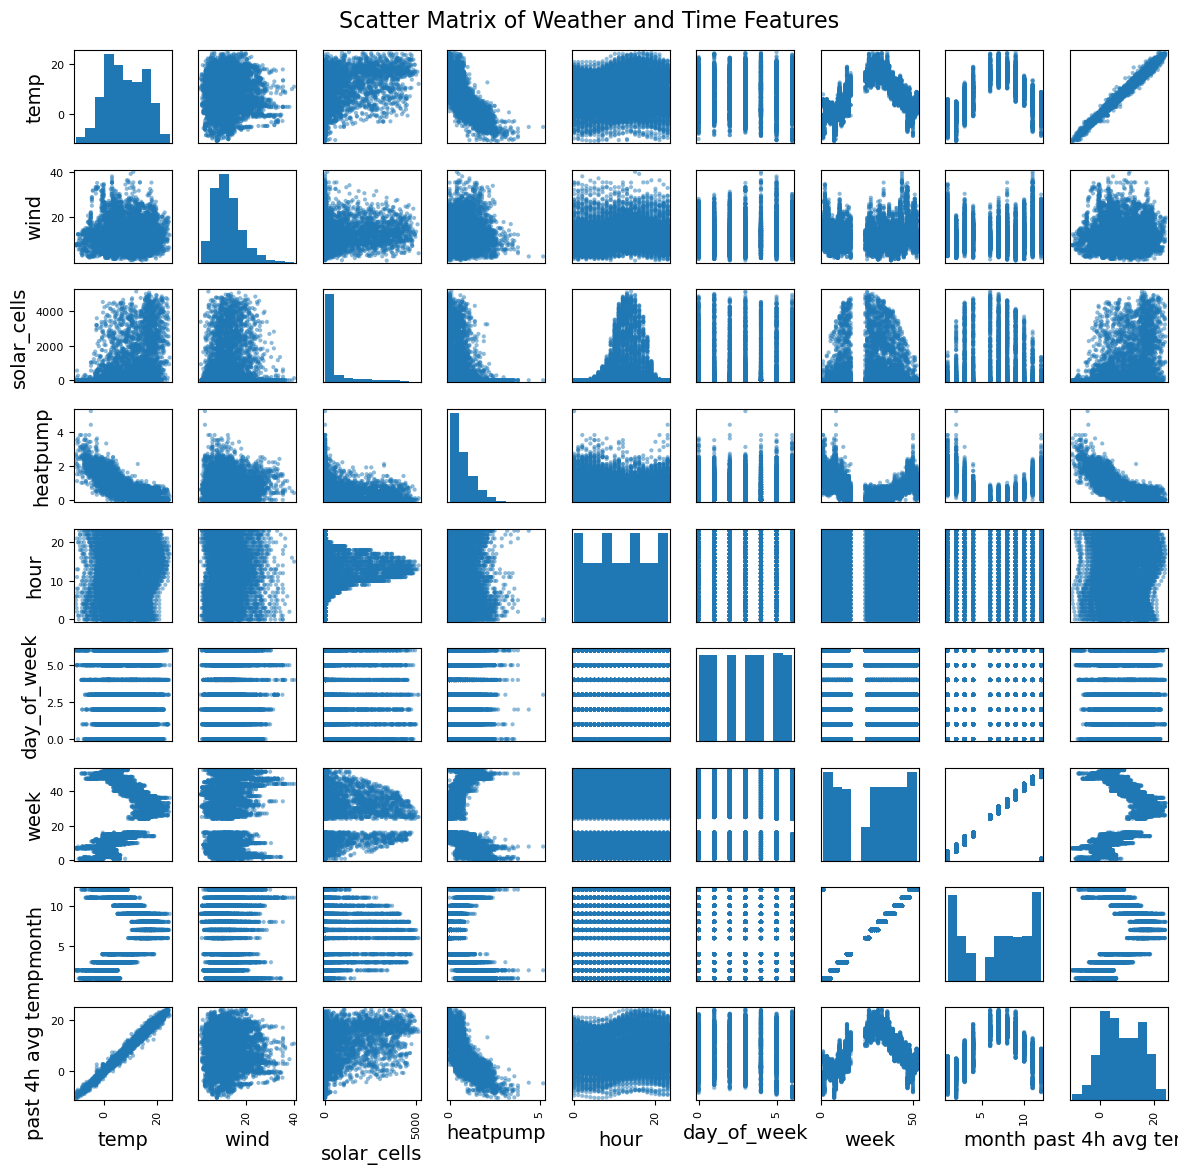

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Select only the numeric columns for the scatter matrix
numeric_cols = [
    "temp", "wind", "solar_cells", "heatpump",
    "hour", "day_of_week", "week", "month", "past 4h avg temp"
]

# Create the scatter matrix
scatter_matrix(df[numeric_cols], figsize=(12, 12), diagonal='hist', alpha=0.5)

plt.suptitle("Scatter Matrix of Weather and Time Features", fontsize=16)
save_fig("scatter_matrix_of_weather_and_time_features")
plt.show()


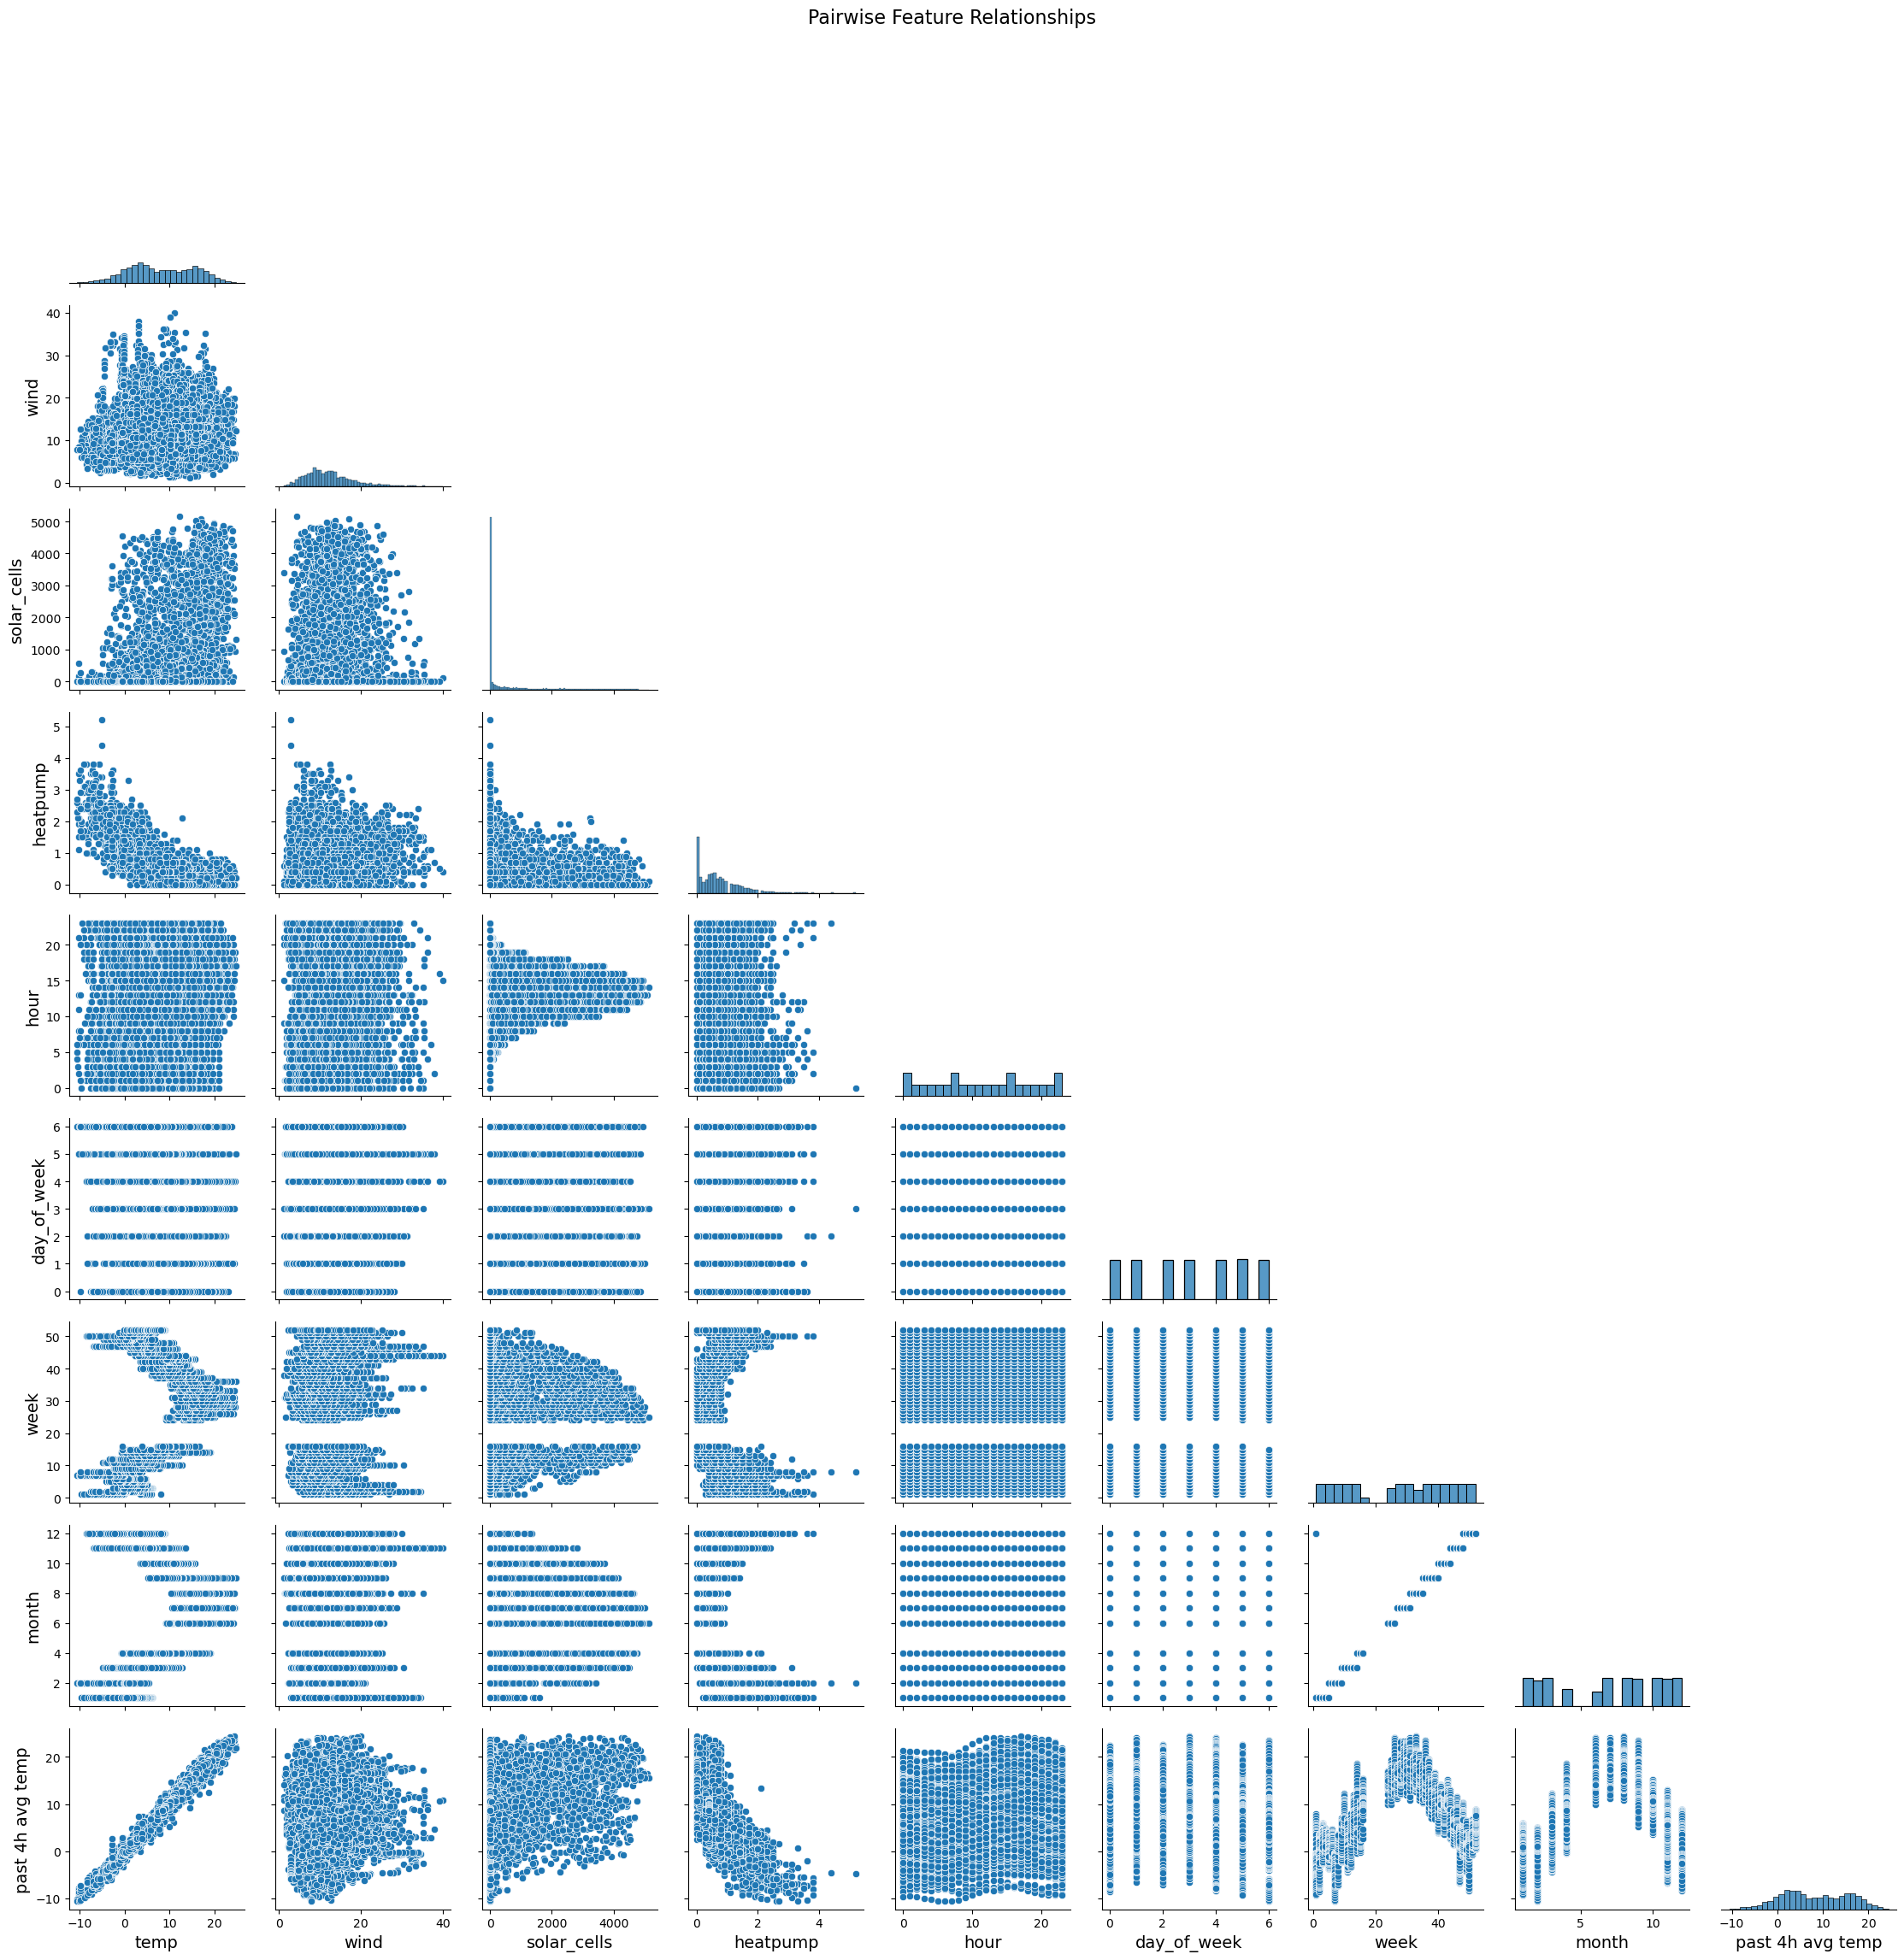

In [ ]:
import seaborn as sns

sns.pairplot(df[numeric_cols], corner=True)
plt.suptitle("Pairwise Feature Relationships", fontsize=16, y=1.02)
save_fig("pairwise_feature_relationships")
plt.show()


Most important features (stronger correlation with heatpump)
1. temp (temperature)
There's a strong negative correlation: as temperature increases, heatpump usage clearly drops.
This makes sense — colder temps = more heating.

2. past 4h avg temp
Also shows a very similar trend to temp.
Could be slightly smoother, helpful for capturing lagged thermal dynamics.

3. hour (of the day)
You can see a clear pattern or banded structure, suggesting that heatpump usage varies by time of day (likely higher at night/morning).
Might capture usage behavior.

4. month
Distinct distribution clusters — suggests seasonal usage behavior.
Worth including, but watch for potential collinearity with temp.

Moderately informative
5. solar_cells
Somewhat inverse relationship: when solar output is high (daytime/sunny), heatpump usage tends to be lower.
Likely tied to temperature & time of day — possible interaction effects.

6. week
Not super clear visually — might still hold seasonal info that isn't captured by month alone.
Less important features (low/no correlation)

7. wind
Very scattered, no clear trend with heatpump.
Might only be useful if you model more complex interactions (e.g., with temp or building insulation).

8. day_of_week
Discrete and evenly distributed — no obvious difference in heatpump usage between days.

In [ ]:
# Egen kod för att kika i ursprunglig strat_train_set
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5932 entries, 4849 to 173
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              5932 non-null   datetime64[ns]
 1   temp              5932 non-null   float64       
 2   wind              5932 non-null   float64       
 3   solar_cells       5932 non-null   float64       
 4   heatpump          5932 non-null   float64       
 5   hour              5932 non-null   int32         
 6   day_of_week       5932 non-null   int32         
 7   week              5932 non-null   UInt32        
 8   month             5932 non-null   int32         
 9   past 4h avg temp  5932 non-null   float64       
dtypes: UInt32(1), datetime64[ns](1), float64(5), int32(3)
memory usage: 422.9 KB


In [ ]:
# Egen kod för att kika i ursprunglig strat_test_set
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1484 entries, 476 to 4101
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              1484 non-null   datetime64[ns]
 1   temp              1484 non-null   float64       
 2   wind              1484 non-null   float64       
 3   solar_cells       1484 non-null   float64       
 4   heatpump          1484 non-null   float64       
 5   hour              1484 non-null   int32         
 6   day_of_week       1484 non-null   int32         
 7   week              1484 non-null   UInt32        
 8   month             1484 non-null   int32         
 9   past 4h avg temp  1484 non-null   float64       
dtypes: UInt32(1), datetime64[ns](1), float64(5), int32(3)
memory usage: 105.8 KB


## Building a full Linear Regression training pipeline with feature scaling and coefficient analysis

1. Select Features & Target

In [ ]:
# Features (exclude 'time' and 'heatpump')
feature_cols = ["temp", "wind", "solar_cells", "hour", "day_of_week", "week", "month", "past 4h avg temp"]
X = df[feature_cols]

# Target
y = df["heatpump"]

2. Use StratifiedShuffleSplit to split into train and test with maintained month seasonality

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified sampling using 'month' as stratification key
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in splitter.split(df, df["month"]):
    strat_train_set = df.loc[train_index].copy()
    strat_test_set = df.loc[test_index].copy()

3. Extract Features and Target from the Stratified Sets

In [ ]:
# Define features to be used
feature_cols = ["temp", "wind", "solar_cells", "hour", "day_of_week", "week", "month", "past 4h avg temp"]

# Training and test features/targets
X_train = strat_train_set[feature_cols]
y_train = strat_train_set["heatpump"]
X_test = strat_test_set[feature_cols]
y_test = strat_test_set["heatpump"]

4. Build a Scikit-Learn Pipeline with Scaling + Linear Regression

In [ ]:
#from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LinearRegression

#pipeline = Pipeline([
    #("scaler", StandardScaler()),
    #("lin_reg", LinearRegression())
#])

#pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

4b. An alternative data split pipeline that includes normalization of features
- solar_cells assumed to have logarithmic distributiond and transformed with log1p
- wind assumed to have logarithmic distributiond and transformed with log1p
- temp assumed to have multimodal distribution and transformed with a radial basis fucntion, RBF

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LinearRegression
import numpy as np

# --- Define features ---
feature_cols = ["temp", "wind", "solar_cells", "hour", "day_of_week", "week", "month", "past 4h avg temp"]

# Group features by transformation type
log_features = ["solar_cells", "wind"]
rbf_features = ["temp"]
scale_features = list(set(feature_cols) - set(log_features) - set(rbf_features))

# --- Define transformers ---
log_transformer = FunctionTransformer(np.log1p, validate=True)
scaler = StandardScaler()
rbf_sampler = RBFSampler(gamma=0.1, n_components=50, random_state=42)

# --- Build ColumnTransformer ---
preprocessor = ColumnTransformer(transformers=[
    ("log", log_transformer, log_features),
    ("rbf_temp", rbf_sampler, rbf_features),
    ("scale", scaler, scale_features)
])

# --- Build pipeline ---
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("lin_reg", LinearRegression())
])

# --- Fit the model ---
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['solar_cells', 'wind']),
                                                 ('rbf_temp',
                                                  RBFSampler(gamma=0.1,
                                                             n_components=50,
                                                             random_state=42),
                                                  ['temp']),
                                                 ('scale', StandardScaler(),
                                                  ['month', 'past 4h avg temp',
                                                   'hour', 'week',
                                                   'day_of_week'])])),
                ('lin_reg', LinearRegression())])

5. Evaluate model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on both training and test sets (original attempt first row)
# y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate metrics (original attempt two first rows)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display results (original attempt two first rows)
# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R² Score: {r2:.2f}")
print("=== Training Set Performance ===")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R² Score: {r2_train:.2f}")

print("\n=== Test Set Performance ===")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R² Score: {r2_test:.2f}")


=== Training Set Performance ===
Mean Squared Error: 0.14
R² Score: 0.67

=== Test Set Performance ===
Mean Squared Error: 0.13
R² Score: 0.67


5b. Evaluate optimized model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on both training and test sets (original attempt first row)
# y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate metrics (original attempt two first rows)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display results (original attempt two first rows)
# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R² Score: {r2:.2f}")
print("=== Training Set Performance opt model ===")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"R² Score: {r2_train:.2f}")

print("\n=== Test Set Performance opt model ===")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R² Score: {r2_test:.2f}")

=== Training Set Performance opt model ===
Mean Squared Error: 0.11
R² Score: 0.74

=== Test Set Performance opt model ===
Mean Squared Error: 0.11
R² Score: 0.73


6. Adding a box plot to compare training and test performance side by side

In [ ]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

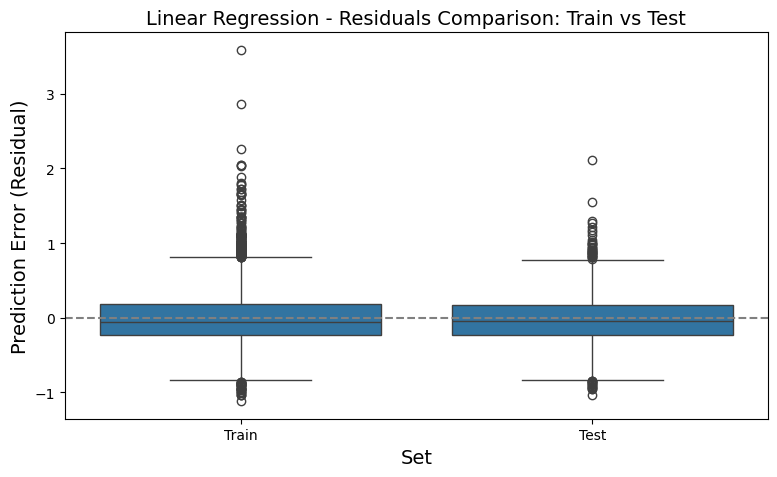

In [ ]:
# Box plot of residual comparison: trains vs test data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Combine into DataFrame
residuals_df = pd.DataFrame({
    "Residual": pd.concat([residuals_train, residuals_test], ignore_index=True),
    "Set": ["Train"] * len(residuals_train) + ["Test"] * len(residuals_test)
})

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Set", y="Residual", data=residuals_df)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Linear Regression - Residuals Comparison: Train vs Test")
plt.ylabel("Prediction Error (Residual)")
save_fig("linear_regression_performance_box_plot")
plt.show()


6b. Adding a boxplot with tuned model

In [ ]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

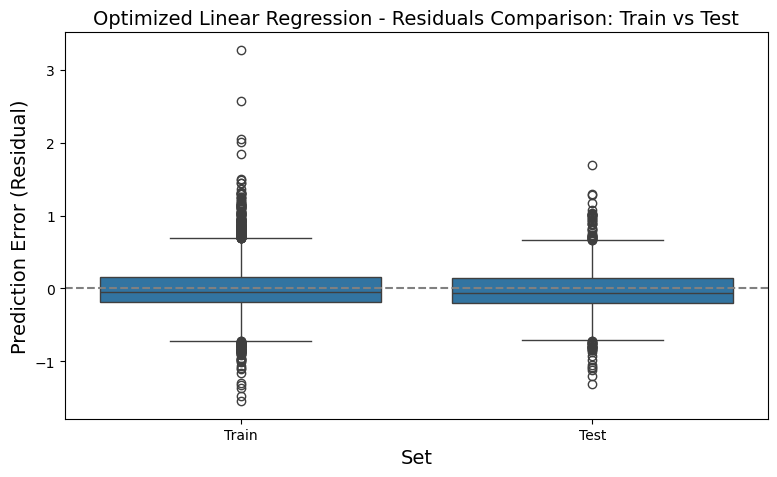

In [ ]:
# Box plot of residual comparison: trains vs test data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Combine into DataFrame
residuals_df = pd.DataFrame({
    "Residual": pd.concat([residuals_train, residuals_test], ignore_index=True),
    "Set": ["Train"] * len(residuals_train) + ["Test"] * len(residuals_test)
})

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Set", y="Residual", data=residuals_df)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Optimized Linear Regression - Residuals Comparison: Train vs Test")
plt.ylabel("Prediction Error (Residual)")
save_fig("opt_linear_regression_performance_box_plot")
plt.show()

Note that there is a similar spread and center that indicates that the model generalizes well.
No major overfitting, nor underfitting.

7. Generate a histogram plot of residuals

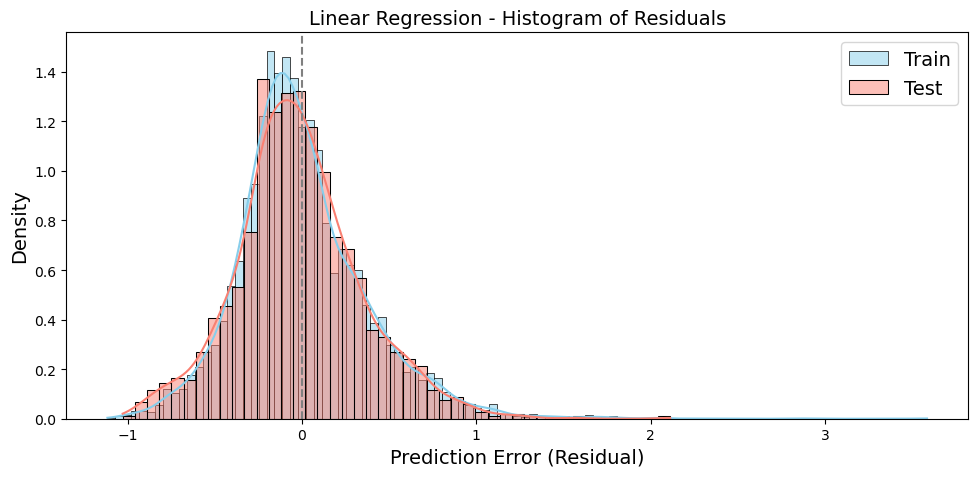

In [ ]:
# Histogram plot of residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals_train, kde=True, color="skyblue", label="Train", stat="density")
sns.histplot(residuals_test, kde=True, color="salmon", label="Test", stat="density")
plt.axvline(0, color='gray', linestyle='--')
plt.title("Linear Regression - Histogram of Residuals")
plt.xlabel("Prediction Error (Residual)")
plt.legend()
save_fig("linear_regression_histogram_of_residuals")
plt.show()


8. Generate a scatter plot

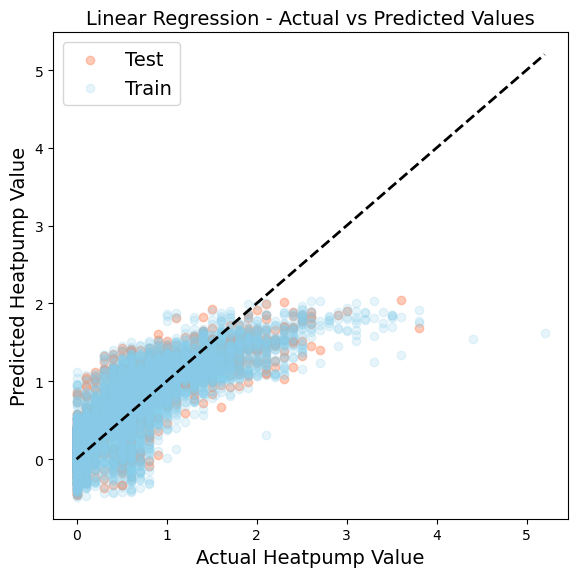

In [ ]:
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4, label="Test", color="coral")
plt.scatter(y_train, y_train_pred, alpha=0.2, label="Train", color="skyblue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("Actual Heatpump Value")
plt.ylabel("Predicted Heatpump Value")
plt.title("Linear Regression - Actual vs Predicted Values")
plt.legend()
save_fig("linear_regression_scatter_plot_ctual_vs_predicted")
plt.show()


8b. Generate a scatter plot of tuned RL model

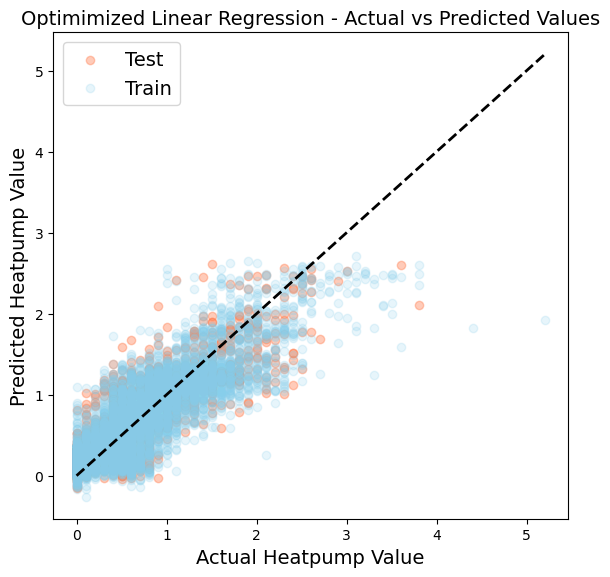

In [ ]:
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4, label="Test", color="coral")
plt.scatter(y_train, y_train_pred, alpha=0.2, label="Train", color="skyblue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("Actual Heatpump Value")
plt.ylabel("Predicted Heatpump Value")
plt.title("Optimimized Linear Regression - Actual vs Predicted Values")
plt.legend()
save_fig("opt_linear_regression_scatter_plot_ctual_vs_predicted")
plt.show()

9. Feature Importance (via Coefficients)

In [ ]:
# Get the trained linear model
lin_model = pipeline.named_steps["lin_reg"]

# Get coefficients with feature names
coef_df = pd.DataFrame({
    "Feature": feature_cols,
    "Coefficient": lin_model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coef_df)

            Feature  Coefficient
7  past 4h avg temp    -0.524271
5              week    -0.061857
1              wind     0.035754
6             month     0.034573
3              hour    -0.017804
0              temp     0.010686
4       day_of_week    -0.004880
2       solar_cells     0.001940


10. Visualize Feature Importance

C:\Users\Viktor\AppData\Local\Temp\ipykernel_15432\2291395077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")


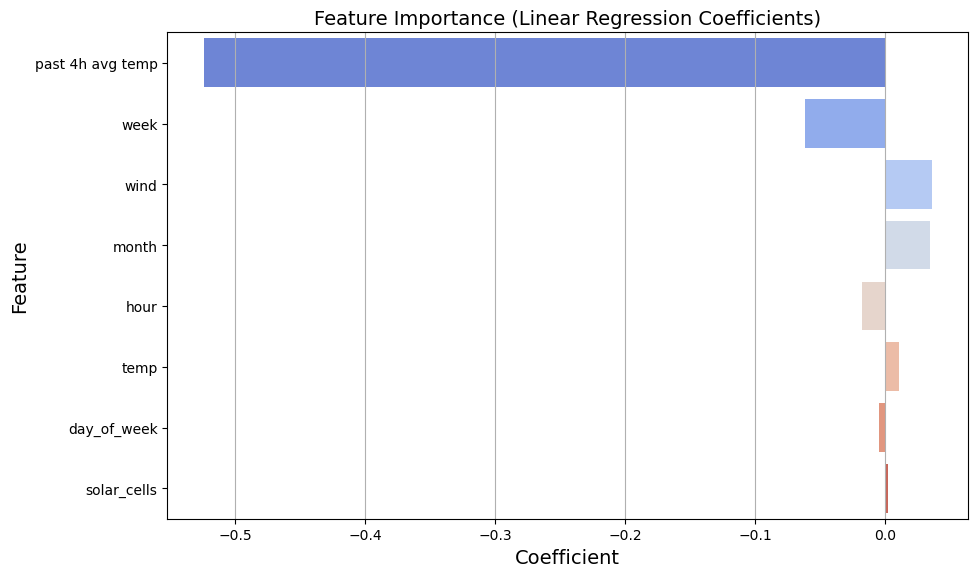

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.grid(True, axis='x')
save_fig("feature_importance_linear_regression_coefficients")
plt.show()


Steps to Check for Over/Underfitting

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Training metrics
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test metrics
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Results
print("Training MSE:", round(mse_train, 3))
print("Training R²:", round(r2_train, 3))
print("Test MSE:", round(mse_test, 3))
print("Test R²:", round(r2_test, 3))


Training MSE: 0.139
Training R²: 0.666
Test MSE: 0.131
Test R²: 0.671


## Building a full random forest training pipeline with coefficient analysis

In [ ]:
# Step 1. Prepare the Features and Target
# Features to include (adjust if needed)
feature_cols = ["temp", "wind", "solar_cells", "hour", "day_of_week", "week", "month", "past 4h avg temp"]

X_train = strat_train_set[feature_cols]
y_train = strat_train_set["heatpump"]

X_test = strat_test_set[feature_cols]
y_test = strat_test_set["heatpump"]

In [ ]:
# Step 2. Create and Train the Random Forest Model
#from sklearn.ensemble import RandomForestRegressor

#rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
#rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

Step 2b Random forest pipeline with slight preprosessing for otimal performance

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assume categorical and numerical features defined
log_features = ["solar_cells", "wind"]
cat_features = ["day_of_week", "month"]
num_features = list(set(feature_cols) - set(log_features) - set(cat_features))

# Define transformers
log_transformer = FunctionTransformer(np.log1p, validate=True)

preprocessor = ColumnTransformer(transformers=[
    ("log", log_transformer, log_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
], remainder="passthrough")  # Keep other numerical features as-is

# Random Forest pipeline
rf_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("rf", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

In [ ]:
# Step 3. Evaluate Performance
#from sklearn.metrics import mean_squared_error, r2_score

# Predictions
#y_train_pred = rf_model.predict(X_train)
#y_test_pred = rf_model.predict(X_test)

# Scores
#mse_train = mean_squared_error(y_train, y_train_pred)
#r2_train = r2_score(y_train, y_train_pred)
#mse_test = mean_squared_error(y_test, y_test_pred)
#r2_test = r2_score(y_test, y_test_pred)

#print("=== Training Set ===")
#print(f"MSE: {mse_train:.2f}, R²: {r2_train:.2f}")

#print("\n=== Test Set ===")
#print(f"MSE: {mse_test:.2f}, R²: {r2_test:.2f}")


=== Training Set ===
MSE: 0.01, R²: 0.97

=== Test Set ===
MSE: 0.07, R²: 0.81


Step 3b adapted to be in line with random forest pipeline 2b.

In [ ]:
# Step 3b. Evaluate Performance
from sklearn.metrics import mean_squared_error, r2_score

# Use the trained pipeline to predict
y_train_pred = rf_pipeline.predict(X_train)
y_test_pred = rf_pipeline.predict(X_test)

# Compute metrics
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display results
print("=== Training Set ===")
print(f"MSE: {mse_train:.2f}, R²: {r2_train:.2f}")

print("\n=== Test Set ===")
print(f"MSE: {mse_test:.2f}, R²: {r2_test:.2f}")


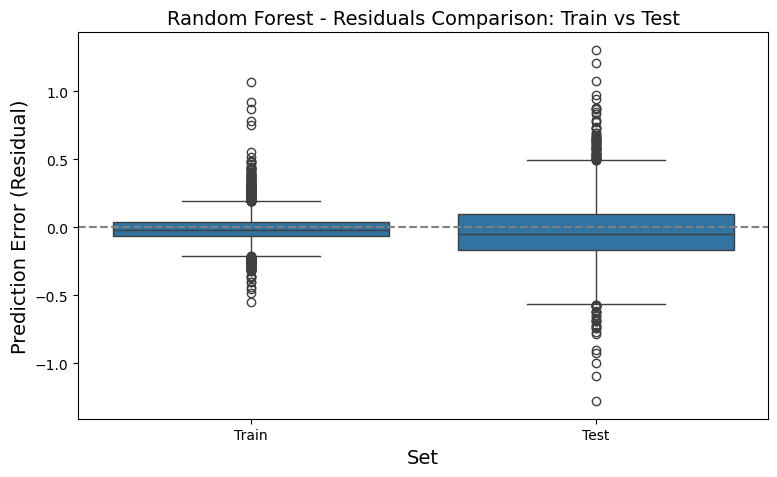

In [ ]:
# Step 4.1 Visualize Errors - Box plot of residuals
# Box plot of residual comparison: trains vs test data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Combine into DataFrame
residuals_df = pd.DataFrame({
    "Residual": pd.concat([residuals_train, residuals_test], ignore_index=True),
    "Set": ["Train"] * len(residuals_train) + ["Test"] * len(residuals_test)
})

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Set", y="Residual", data=residuals_df)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Random Forest - Residuals Comparison: Train vs Test")
plt.ylabel("Prediction Error (Residual)")
save_fig("random forest_performance_box_plot")
plt.show()



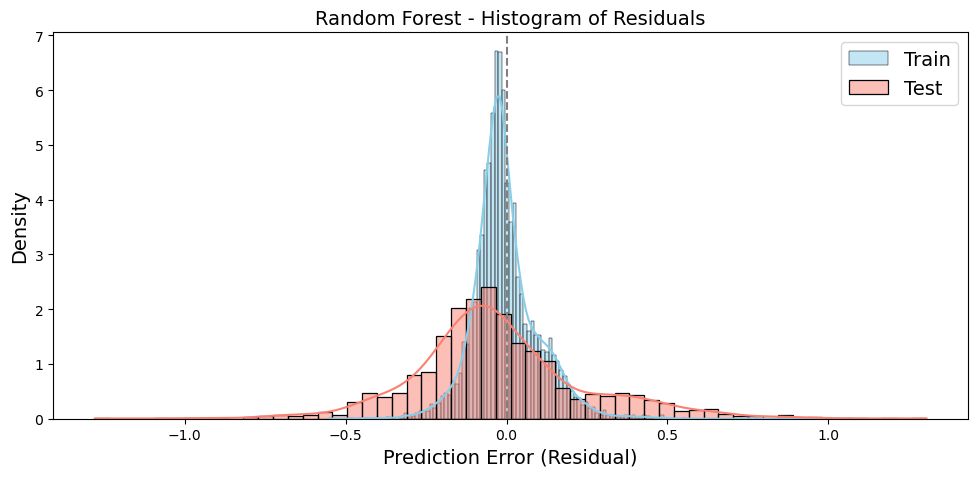

In [ ]:
# Step 4.2 Visualize Errors - Histogram of residuals
# Histogram plot of residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals_train, kde=True, color="skyblue", label="Train", stat="density")
sns.histplot(residuals_test, kde=True, color="salmon", label="Test", stat="density")
plt.axvline(0, color='gray', linestyle='--')
plt.title("Random Forest - Histogram of Residuals")
plt.xlabel("Prediction Error (Residual)")
plt.legend()
save_fig("random_forest_histogram_of_residuals")
plt.show()


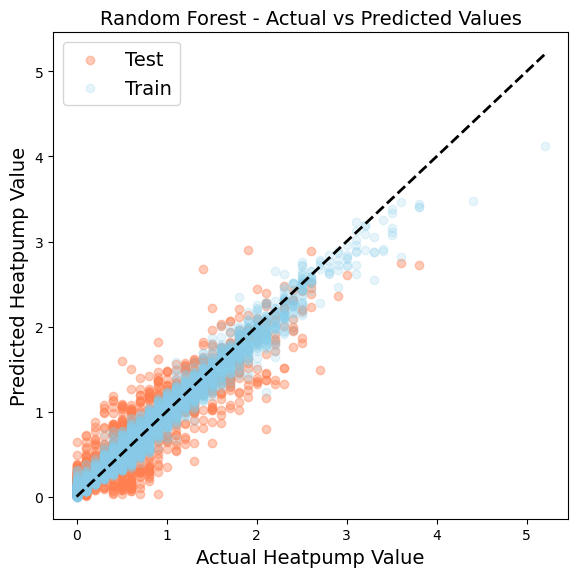

In [ ]:
# Step 4.3 Visualize Errors -  Scatter plot of actual vs predicted
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4, label="Test", color="coral")
plt.scatter(y_train, y_train_pred, alpha=0.2, label="Train", color="skyblue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("Actual Heatpump Value")
plt.ylabel("Predicted Heatpump Value")
plt.title("Random Forest - Actual vs Predicted Values")
plt.legend()
save_fig("random_forest_plot_actual_vs_predicted")
plt.show()

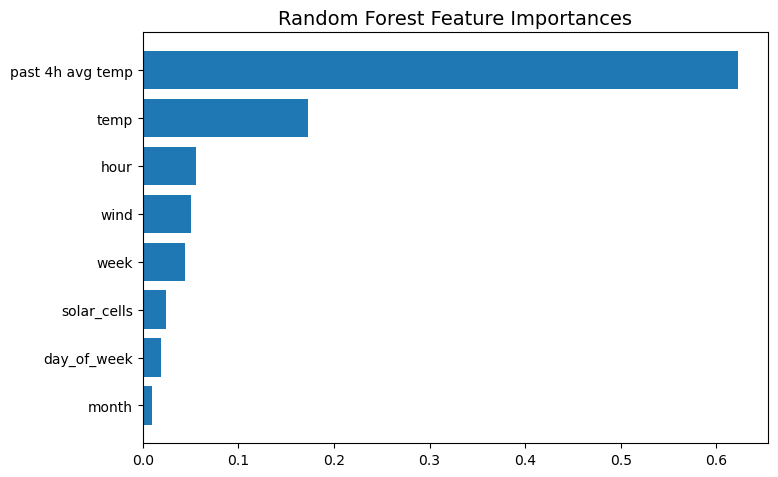

In [ ]:
# Step 5. View feature importance
import pandas as pd
import matplotlib.pyplot as plt

# Feature importances
importances = rf_model.feature_importances_
feat_imp_df = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"])
plt.title("Random Forest Feature Importances")
plt.gca().invert_yaxis()
save_fig("random_forest_feature_importance")
plt.show()


In [ ]:
# Tune parameters (optional)
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=3,
                           scoring='r2',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
rf_tuned_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Evaluate tuned random forest (best_model)
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_train_pred_rf_tuned = rf_tuned_model.predict(X_train)
y_test_pred_rf_tuned = rf_tuned_model.predict(X_test)

# Scores
mse_train = mean_squared_error(y_train, y_train_pred_rf_tuned)
r2_train = r2_score(y_train, y_train_pred_rf_tuned)
mse_test = mean_squared_error(y_test, y_test_pred_rf_tuned)
r2_test = r2_score(y_test, y_test_pred_rf_tuned)

print("=== Training Set ===")
print(f"MSE: {mse_train:.2f}, R²: {r2_train:.2f}")

print("\n=== Test Set ===")
print(f"MSE: {mse_test:.2f}, R²: {r2_test:.2f}")

=== Training Set ===
MSE: 0.02, R²: 0.95

=== Test Set ===
MSE: 0.07, R²: 0.82


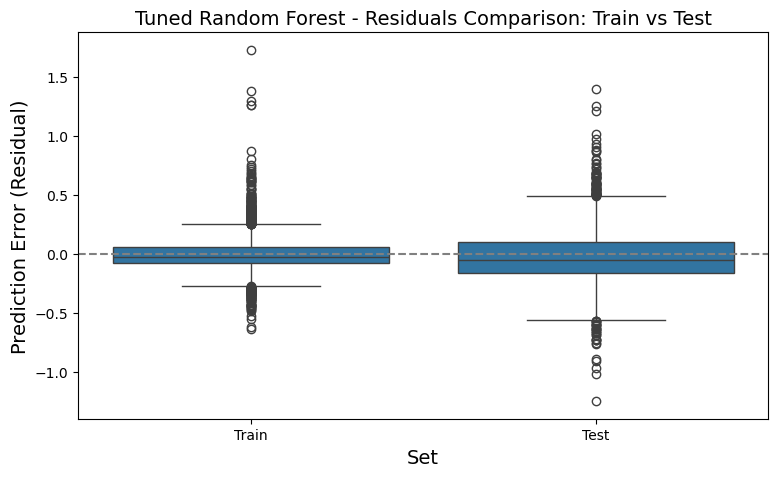

In [ ]:
# Step 4.1b Visualize Errors - Box plot of residuals with tuned random forest
# Box plot of residual comparison: trains vs test data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Residuals
residuals_train = y_train - y_train_pred_rf_tuned
residuals_test = y_test - y_test_pred_rf_tuned

# Combine into DataFrame
residuals_df = pd.DataFrame({
    "Residual": pd.concat([residuals_train, residuals_test], ignore_index=True),
    "Set": ["Train"] * len(residuals_train) + ["Test"] * len(residuals_test)
})

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Set", y="Residual", data=residuals_df)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Tuned Random Forest - Residuals Comparison: Train vs Test")
plt.ylabel("Prediction Error (Residual)")
save_fig("tuned_random_forest_performance_box_plot")
plt.show()

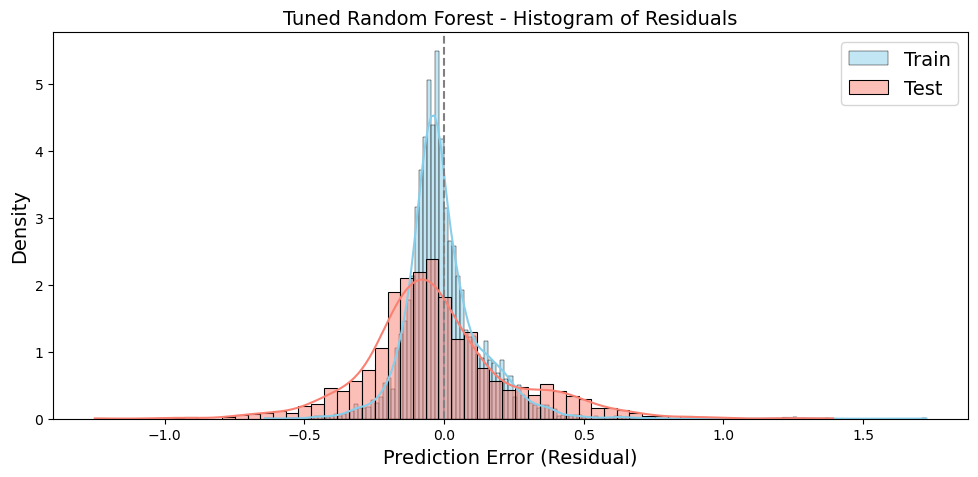

In [ ]:
# Step 4.2b Visualize Errors - Histogram of residuals with tuned random forest
# Histogram plot of residuals
plt.figure(figsize=(10, 5))
sns.histplot(residuals_train, kde=True, color="skyblue", label="Train", stat="density")
sns.histplot(residuals_test, kde=True, color="salmon", label="Test", stat="density")
plt.axvline(0, color='gray', linestyle='--')
plt.title("Tuned Random Forest - Histogram of Residuals")
plt.xlabel("Prediction Error (Residual)")
plt.legend()
save_fig("tuned_random_forest_histogram_of_residuals")
plt.show()


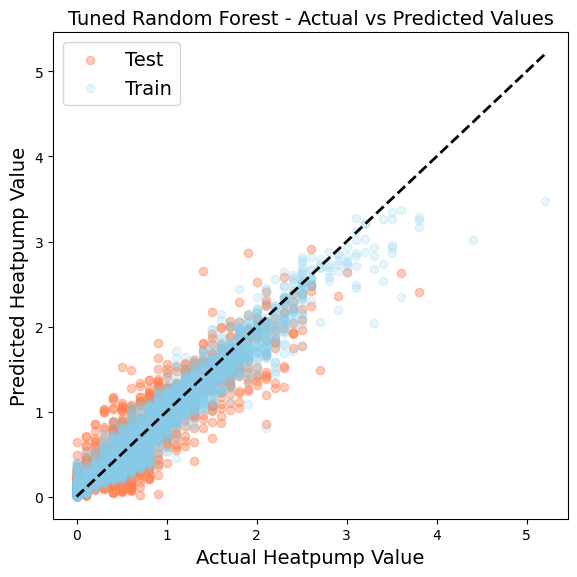

In [ ]:
# Step 4.3b Visualize Errors -  Scatter plot of actual vs predicted for tuned random forest
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred_rf_tuned, alpha=0.4, label="Test", color="coral")
plt.scatter(y_train, y_train_pred_rf_tuned, alpha=0.2, label="Train", color="skyblue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("Actual Heatpump Value")
plt.ylabel("Predicted Heatpump Value")
plt.title("Tuned Random Forest - Actual vs Predicted Values")
plt.legend()
save_fig("tuned_random_forest_plot_actual_vs_predicted")
plt.show()